# Downloading MODIS Data

In [ ]:
!pip install modis-tools

**Need to Sign up**! - [clickhere](https://urs.earthdata.nasa.gov/profile)

I also used the references from GEE found [here](https://developers.google.com/earth-engine/datasets/catalog/modis). 
It was very difficult to navigate to the many, many, many files found on cmr.earthdata.

In this example, we're looking at the MOD09GQ.061 Terra Surface Reflectance Daily Global 250m. More info can be found at the [usgs database](https://lpdaac.usgs.gov/products/mod09gqv061/) but I highly recommend [GEE summaries](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD09GQ) or [gibs wiki](https://nasa-gibs.github.io/gibs-api-docs/available-visualizations/#visualization-product-catalog).

In [1]:
from modis_tools.auth import ModisSession
from modis_tools.resources import CollectionApi, GranuleApi
from modis_tools.granule_handler import GranuleHandler

username = ""  # Update this line
password = ""  # Update this line

# Authenticate a session
session = ModisSession(username=username, password=password)

ModuleNotFoundError: No module named 'modis_tools'

In [ ]:

# Query the MODIS catalog for collections
collection_client = CollectionApi(session=session)

# TODO: Code works for Level-3, but not Level-1 yet
# collections = collection_client.query(short_name="MYD021KM", version="061")
collections = collection_client.query(short_name="MOD02HKM", version="061")
print(collections)

# Query the selected collection for granules
granule_client = GranuleApi.from_collection(collections[0], session=session)

# Filter the selected granules via spatial and temporal parameters
# Filter the selected granules via spatial and temporal parameters
nigeria_bbox = [2.1448863675, 4.002583177, 15.289420717, 14.275061098]
nigeria_granules = granule_client.query(start_date="2018-10-01", end_date="2018-10-02", bounding_box=nigeria_bbox)

In [ ]:
GranuleHandler.download_from_granules(nigeria_granules, session)

## Earth Access

In [21]:
# ! pip install earthaccess

In [2]:
# EARTHDATA_USERNAME 
# EARTHDATA_PASSWORD 
# environment variables

import os
os.environ['EARTHDATA_USERNAME'] = ''
os.environ['EARTHDATA_PASSWORD'] = ''

In [9]:
import earthaccess
import xarray as xr

In [4]:
# Testing data download
# count: if set to a n, search_data returns the first n results - if n is greater than the number of results, all results are returned

results = earthaccess.search_data(
    short_name='MOD021KM',
    cloud_hosted=True,
    bounding_box=(-10, 20, 10, 50),
    temporal=("2018-10-01 08:00", "2018-10-01 11:00"),
    count=-1
)

Granules found: 3


In [5]:
# Testing Cloud Mask Download

results = earthaccess.search_data(
    short_name='MOD35_L2',
    cloud_hosted=True,
    bounding_box=(-10, 20, 10, 50),
    temporal=("2018-10-01 08:00", "2018-10-01 11:00"),
    count=-1
)

Granules found: 3


In [6]:
results

[Collection: {'ShortName': 'MOD35_L2', 'Version': '6.1'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -7.820944, 'Latitude': 48.615273}, {'Longitude': 22.900313, 'Latitude': 44.459754}, {'Longitude': 38.493195, 'Latitude': 60.213084}, {'Longitude': -8.461157, 'Latitude': 66.899476}, {'Longitude': -7.820944, 'Latitude': 48.615273}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2018-10-01T10:30:00.000Z', 'EndingDateTime': '2018-10-01T10:35:00.000Z'}}
 Size(MB): 14.6982021331787
 Data: ['https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MOD35_L2/2018/274/MOD35_L2.A2018274.1030.061.2018274200426.hdf'],
 Collection: {'ShortName': 'MOD35_L2', 'Version': '6.1'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -9.762663, 'Latitude': 30.785606}, {'Longitude': 14.294732, 'Latitude': 27.52965}, {'Longitude': 22.400958, 'Latitude': 44.68

In [7]:
files = earthaccess.download(results, "./modisdata/earthaccess2/")

 Getting 3 granules, approx download size: 0.04 GB


QUEUEING TASKS | : 100%|██████████| 3/3 [00:00<00:00, 975.95it/s]
PROCESSING TASKS | : 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]
COLLECTING RESULTS | : 100%|██████████| 3/3 [00:00<00:00, 26772.15it/s]


In [30]:
import xarray as xr

ds = xr.open_dataset('./modisdata/earthaccess2/MOD021KM.A2018274.1030.061.2018274200208.hdf', engine='netcdf4')

In [39]:
files

['modisdata/earthaccess2/MOD021KM.A2018274.1030.061.2018274200208.hdf',
 'modisdata/earthaccess2/MOD021KM.A2018274.1035.061.2018274200111.hdf',
 'modisdata/earthaccess2/MOD021KM.A2018274.1040.061.2018274200246.hdf']

In [41]:
ds = xr.open_dataset(files[0], engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:                                            (
                                                        2*nscans:MODIS_SWATH_Type_L1B: 406,
                                                        1KM_geo_dim:MODIS_SWATH_Type_L1B: 271,
                                                        Band_1KM_RefSB:MODIS_SWATH_Type_L1B: 15,
                                                        10*nscans:MODIS_SWATH_Type_L1B: 2030,
                                                        Max_EV_frames:MODIS_SWATH_Type_L1B: 1354,
                                                        ...
                                                        number of scans: 203,
                                                        number of 250m bands: 2,
                                                        detectors per 250m band: 40,
                                                        number of 500m bands: 5,
                                                        detectors per 500m band: 20,
                                                        number of 1km reflective bands: 15)
Coordinates:
  * Band_250M                                          (Band_250M) float32 1....
  * Band_500M                                          (Band_500M) float32 3....
  * Band_1KM_RefSB                                     (Band_1KM_RefSB) float32 ...
  * Band_1KM_Emissive                                  (Band_1KM_Emissive) float32 ...
Dimensions without coordinates: 2*nscans:MODIS_SWATH_Type_L1B,
                                1KM_geo_dim:MODIS_SWATH_Type_L1B,
                                Band_1KM_RefSB:MODIS_SWATH_Type_L1B,
                                10*nscans:MODIS_SWATH_Type_L1B,
                                Max_EV_frames:MODIS_SWATH_Type_L1B,
                                Band_1KM_Emissive:MODIS_SWATH_Type_L1B,
                                ...
                                Band_500M:MODIS_SWATH_Type_L1B,
                                number of emissive bands,
                                detectors per 1km band, number of scans,
                                number of 250m bands, detectors per 250m band,
                                number of 500m bands, detectors per 500m band,
                                number of 1km reflective bands
Data variables: (12/27)
    Latitude                                           (2*nscans:MODIS_SWATH_Type_L1B, 1KM_geo_dim:MODIS_SWATH_Type_L1B) float32 ...
    Longitude                                          (2*nscans:MODIS_SWATH_Type_L1B, 1KM_geo_dim:MODIS_SWATH_Type_L1B) float32 ...
    EV_1KM_RefSB                                       (Band_1KM_RefSB:MODIS_SWATH_Type_L1B, 10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float32 ...
    EV_1KM_RefSB_Uncert_Indexes                        (Band_1KM_RefSB:MODIS_SWATH_Type_L1B, 10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float32 ...
    EV_1KM_Emissive                                    (Band_1KM_Emissive:MODIS_SWATH_Type_L1B, 10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float32 ...
    EV_1KM_Emissive_Uncert_Indexes                     (Band_1KM_Emissive:MODIS_SWATH_Type_L1B, 10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float32 ...
    ...                                                 ...
    Noise in Thermal Detectors                         (number of emissive bands, detectors per 1km band) uint8 ...
    Change in relative responses of thermal detectors  (number of emissive bands, detectors per 1km band) uint8 ...
    DC Restore Change for Thermal Bands                (number of scans, number of emissive bands, detectors per 1km band) int8 ...
    DC Restore Change for Reflective 250m Bands        (number of scans, number of 250m bands, detectors per 250m band) int8 ...
    DC Restore Change for Reflective 500m Bands        (number of scans, number of 500m bands, detectors per 500m band) int8 ...
    DC Restore Cha

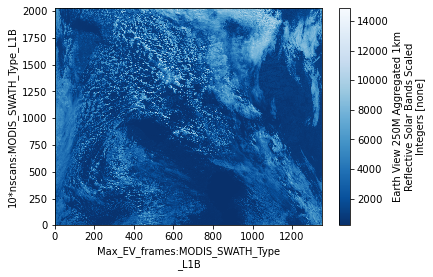

In [49]:
ds.EV_250_Aggr1km_RefSB[0].plot(cmap='Blues_r') # band 1

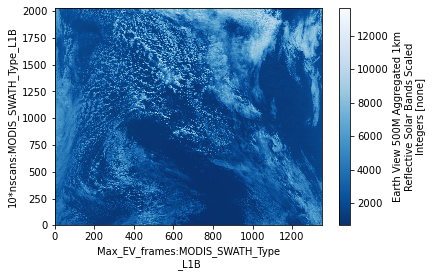

In [52]:
ds.EV_500_Aggr1km_RefSB[0].plot(cmap='Blues_r') # band 3

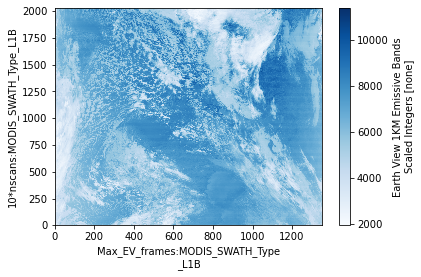

In [45]:
ds.EV_1KM_Emissive[5].plot(cmap='Blues') # band 25

### Investigate Cloud Mask

In [11]:
ds = xr.open_dataset('./modisdata/earthaccess2/MOD35_L2.A2018274.1030.061.2018274200426.hdf', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:            (Cell_Along_Swath_5km:mod35: 406,
                        Cell_Across_Swath_5km:mod35: 270,
                        Cell_Along_Swath_1km:mod35: 2030,
                        Cell_Across_Swath_1km:mod35: 1354, SPI_nband:mod35: 2,
                        Byte_Segment:mod35: 6, QA_Dimension:mod35: 10)
Dimensions without coordinates: Cell_Along_Swath_5km:mod35,
                                Cell_Across_Swath_5km:mod35,
                                Cell_Along_Swath_1km:mod35,
                                Cell_Across_Swath_1km:mod35, SPI_nband:mod35,
                                Byte_Segment:mod35, QA_Dimension:mod35
Data variables:
    Latitude           (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) float32 ...
    Longitude          (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) float32 ...
    Scan_Start_Time    (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) datetime64[ns] ...
    Solar_Zenith       (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) float32 ...
    Solar_Azimuth      (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) float32 ...
    Sensor_Zenith      (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) float32 ...
    Sensor_Azimuth     (Cell_Along_Swath_5km:mod35, Cell_Across_Swath_5km:mod35) float32 ...
    Cloud_Mask_SPI     (Cell_Along_Swath_1km:mod35, Cell_Across_Swath_1km:mod35, SPI_nband:mod35) float32 ...
    Cloud_Mask         (Byte_Segment:mod35, Cell_Along_Swath_1km:mod35, Cell_Across_Swath_1km:mod35) float32 ...
    Quality_Assurance  (Cell_Along_Swath_1km:mod35, Cell_Across_Swath_1km:mod35, QA_Dimension:mod35) float32 ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.19
    StructMetadata.0:                  GROUP=SwathStructure\n\tGROUP=SWATH_1\...
    Number_of_Instrument_Scans:        2030
    Maximum_Number_of_1km_Frames:      1354
    history:                           $Id: MOD35.V2.CDL,v 1.1.2.5 2002/09/16...
    title:                             MODIS Level 2 Cloud Mask              ...
    UW_DESTRIPE_LWIR:                  $Id: hdf_destripe_new.f90,v 1.8 2004/0...
    UW_DESTRIPE_CONFIG:                # Terra MODIS destriping configuration...
    CoreMetadata.0:                    \nGROUP                  = INVENTORYME...
    ArchiveMetadata.0:                 \nGROUP                  = ARCHIVEDMET...
    identifier_product_doi:            10.5067/MODIS/MOD35_L2.061
    identifier_product_doi_authority:  http://dx.doi.org

In [21]:
ds.Cloud_Mask

<xarray.DataArray 'Cloud_Mask' (Byte_Segment:mod35: 6,
                                Cell_Along_Swath_1km:mod35: 2030,
                                Cell_Across_Swath_1km:mod35: 1354)>
[16491720 values with dtype=float32]
Dimensions without coordinates: Byte_Segment:mod35, Cell_Along_Swath_1km:mod35,
                                Cell_Across_Swath_1km:mod35
Attributes:
    valid_range:                 [ 0 -1]
    long_name:                   MODIS Cloud Mask and Spectral Test Results
    units:                       none
    Parameter_Type:              Output
    Cell_Along_Swath_Sampling:   [   1 2030    1]
    Cell_Across_Swath_Sampling:  [   1 1354    1]
    Geolocation_Pointer:         External MODIS geolocation product
    description:                 \n                                          ...

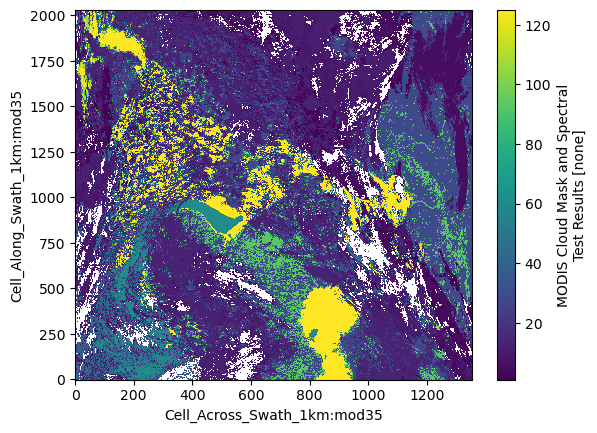

In [28]:
ds.Cloud_Mask[2].plot()